In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Import the datetime module from the datetime library.
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2045ca032793d4b29b3dd67358c2395d


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | butaritari
Processing Record 2 of Set 12 | ushuaia
Processing Record 3 of Set 12 | rikitea
Processing Record 4 of Set 12 | pereslavl-zalesskiy
Processing Record 5 of Set 12 | mount gambier
Processing Record 6 of Set 12 | hasaki
Processing Record 7 of Set 12 | punta arenas
Processing Record 8 of Set 12 | surt
Processing Record 9 of Set 12 | nome
Processing Record 10 of Set 12 | atuona
Processing Record 11 of Set 12 | manokwari
Processing Record 12 of Set 12 | pontianak
Processing Record 13 of Set 12 | thompson
Processing Record 14 of Set 12 | port lincoln
Processing Record 15 of Set 12 | lavrentiya
Processing Record 16 of Set 12 | kendari
Processing Record 17 of Set 12 | barcelos
Processing Record 18 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 12 | izazi
Processing Record 20 of Set 12 | ayan
Processing Record 21 of Set 12 | richards bay
Processing Record 22 of 

Processing Record 35 of Set 15 | rudbar
Processing Record 36 of Set 15 | pisco
Processing Record 37 of Set 15 | margate
Processing Record 38 of Set 15 | poum
Processing Record 39 of Set 15 | toamasina
Processing Record 40 of Set 15 | kazalinsk
City not found. Skipping...
Processing Record 41 of Set 15 | petropavlovsk-kamchatskiy
Processing Record 42 of Set 15 | bathsheba
Processing Record 43 of Set 15 | kralendijk
Processing Record 44 of Set 15 | qaqortoq
Processing Record 45 of Set 15 | port alfred
Processing Record 46 of Set 15 | torbay
Processing Record 47 of Set 15 | severo-kurilsk
Processing Record 48 of Set 15 | port macquarie
Processing Record 49 of Set 15 | sungurlu
Processing Record 50 of Set 15 | tabuk
Processing Record 1 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 16 | ancud
Processing Record 3 of Set 16 | rungata
City not found. Skipping...
Processing Record 4 of Set 16 | bengkalis
City not found. Skipping...
Processing Record 5 of Set 16

Processing Record 15 of Set 19 | ivanovka
Processing Record 16 of Set 19 | victoria
Processing Record 17 of Set 19 | longyearbyen
Processing Record 18 of Set 19 | ilabaya
Processing Record 19 of Set 19 | bodden town
Processing Record 20 of Set 19 | jackson
Processing Record 21 of Set 19 | aguie
Processing Record 22 of Set 19 | coquimbo
Processing Record 23 of Set 19 | iskateley
Processing Record 24 of Set 19 | kokopo
Processing Record 25 of Set 19 | caborca
Processing Record 26 of Set 19 | kushmurun
Processing Record 27 of Set 19 | tahta
Processing Record 28 of Set 19 | ust-tsilma
Processing Record 29 of Set 19 | garowe
Processing Record 30 of Set 19 | chuy
Processing Record 31 of Set 19 | ternate
Processing Record 32 of Set 19 | rincon
Processing Record 33 of Set 19 | pauini
Processing Record 34 of Set 19 | karamay
City not found. Skipping...
Processing Record 35 of Set 19 | snyder
Processing Record 36 of Set 19 | seymchan
Processing Record 37 of Set 19 | labuhan
Processing Record 38 

Processing Record 4 of Set 23 | boa vista
Processing Record 5 of Set 23 | fairbanks
Processing Record 6 of Set 23 | blackwater
Processing Record 7 of Set 23 | ust-barguzin
Processing Record 8 of Set 23 | luanda
Processing Record 9 of Set 23 | beira
Processing Record 10 of Set 23 | la primavera
Processing Record 11 of Set 23 | bontang
Processing Record 12 of Set 23 | taoudenni
Processing Record 13 of Set 23 | praia da vitoria
Processing Record 14 of Set 23 | whitehorse
Processing Record 15 of Set 23 | sarai
Processing Record 16 of Set 23 | santa isabel do rio negro
Processing Record 17 of Set 23 | falmouth
Processing Record 18 of Set 23 | acajutla
Processing Record 19 of Set 23 | palu
Processing Record 20 of Set 23 | mananara
Processing Record 21 of Set 23 | pierre
Processing Record 22 of Set 23 | key biscayne
Processing Record 23 of Set 23 | rassvet
Processing Record 24 of Set 23 | shache
Processing Record 25 of Set 23 | denpasar
Processing Record 26 of Set 23 | chau doc
Processing Rec

In [7]:
len(city_data)

549

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,82.76,74,6,13.35,KI,2021-09-10 02:58:09
1,Ushuaia,-54.8000,-68.3000,47.86,46,40,11.50,AR,2021-09-10 02:55:13
2,Rikitea,-23.1203,-134.9692,71.62,86,73,19.15,PF,2021-09-10 02:59:57
3,Pereslavl-Zalesskiy,56.7393,38.8563,55.44,90,85,9.86,RU,2021-09-10 02:59:57
4,Mount Gambier,-37.8333,140.7667,58.91,63,100,12.66,AU,2021-09-10 02:59:57
5,Hasaki,35.7333,140.8333,82.80,74,9,11.14,JP,2021-09-10 02:59:57
6,Punta Arenas,-53.1500,-70.9167,42.55,65,69,7.56,CL,2021-09-10 02:56:32
7,Surt,31.2089,16.5887,76.08,61,0,12.62,LY,2021-09-10 02:59:58
8,Nome,64.5011,-165.4064,53.67,76,75,11.50,US,2021-09-10 02:59:37
9,Atuona,-9.8000,-139.0333,78.60,75,3,10.76,PF,2021-09-10 02:55:32


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-09-10 02:58:09,3.0707,172.7902,82.76,74,6,13.35
1,Ushuaia,AR,2021-09-10 02:55:13,-54.8000,-68.3000,47.86,46,40,11.50
2,Rikitea,PF,2021-09-10 02:59:57,-23.1203,-134.9692,71.62,86,73,19.15
3,Pereslavl-Zalesskiy,RU,2021-09-10 02:59:57,56.7393,38.8563,55.44,90,85,9.86
4,Mount Gambier,AU,2021-09-10 02:59:57,-37.8333,140.7667,58.91,63,100,12.66
5,Hasaki,JP,2021-09-10 02:59:57,35.7333,140.8333,82.80,74,9,11.14
6,Punta Arenas,CL,2021-09-10 02:56:32,-53.1500,-70.9167,42.55,65,69,7.56
7,Surt,LY,2021-09-10 02:59:58,31.2089,16.5887,76.08,61,0,12.62
8,Nome,US,2021-09-10 02:59:37,64.5011,-165.4064,53.67,76,75,11.50
9,Atuona,PF,2021-09-10 02:55:32,-9.8000,-139.0333,78.60,75,3,10.76


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

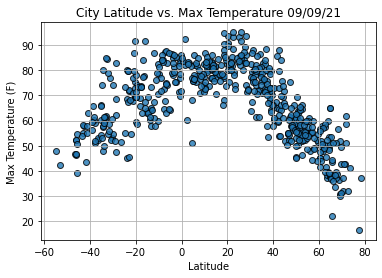

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

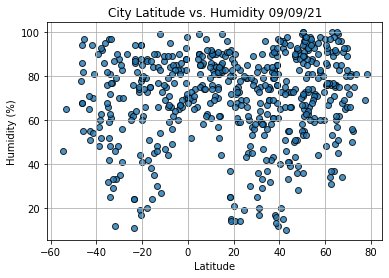

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

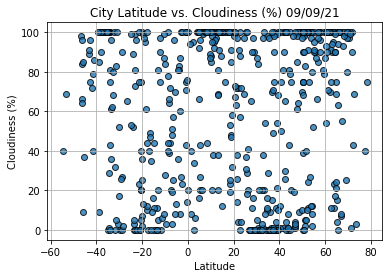

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

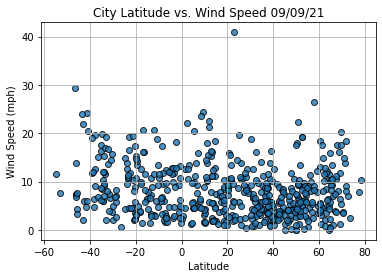

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is {r_value:.3f}")

In [17]:
index13 = city_data_df.loc[13]

In [18]:
index13

City                 Port Lincoln
Country                        AU
Date          2021-09-10 02:59:59
Lat                      -34.7333
Lng                      135.8667
Max Temp                    74.28
Humidity                       32
Cloudiness                      0
Wind Speed                  19.84
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
544     True
545    False
546     True
547    False
548     True
Name: Lat, Length: 549, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-09-10 02:58:09,3.0707,172.7902,82.76,74,6,13.35
3,Pereslavl-Zalesskiy,RU,2021-09-10 02:59:57,56.7393,38.8563,55.44,90,85,9.86
5,Hasaki,JP,2021-09-10 02:59:57,35.7333,140.8333,82.80,74,9,11.14
7,Surt,LY,2021-09-10 02:59:58,31.2089,16.5887,76.08,61,0,12.62
8,Nome,US,2021-09-10 02:59:37,64.5011,-165.4064,53.67,76,75,11.50


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

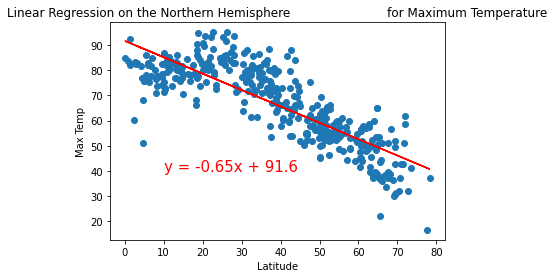

The r-value is -0.826


In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

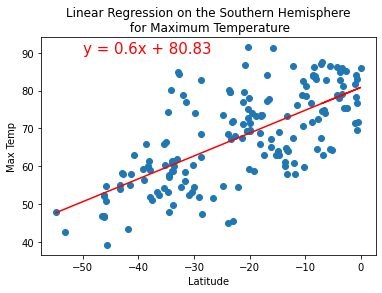

The r-value is 0.682


In [24]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Maximum Temperature", "Max Temp", (-50,90))

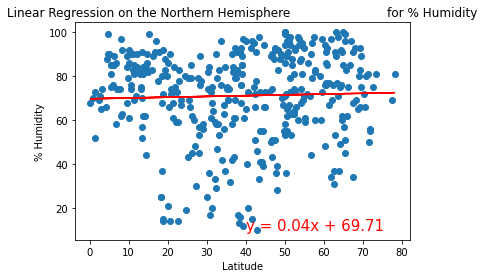

The r-value is 0.034


In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

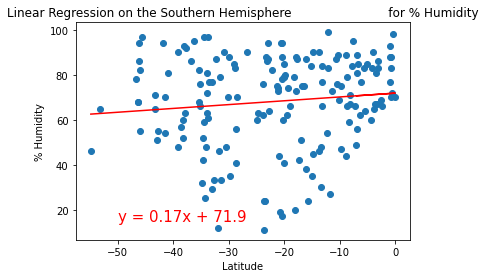

The r-value is 0.113


In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

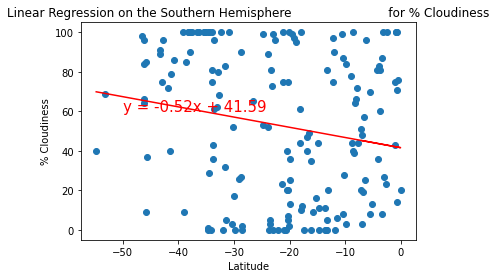

The r-value is -0.189


In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

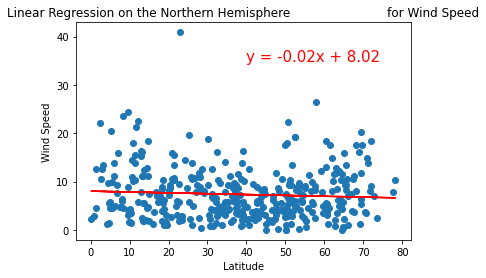

The r-value is -0.065


In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

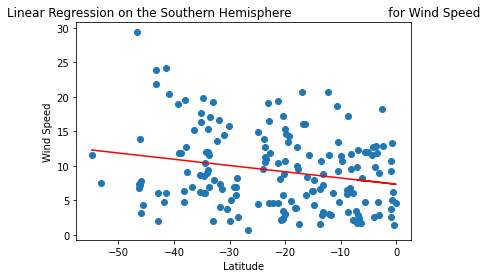

The r-value is -0.220


In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
